# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.neighbors import LocalOutlierFactor


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [571]:
# Load dataset
file_path = "https://raw.githubusercontent.com/SoraIroShiro/submission_basic_ML/refs/heads/main/garisKemiskinan.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [572]:
# Memahami struktur data
# Melihat jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df.shape}")

# Melihat informasi dataset
print(df.info())

# Menampilkan beberapa baris pertama dataset
display(df.head())

# Melihat ringkasan statistik deskriptif untuk data numerik
display(df.describe())

Jumlah baris dan kolom: (5460, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [573]:
# Menampilkan jumlah missing values sebelum penghapusan
missing_values_before = df.isnull().sum()

# Menghapus baris dengan missing values
df_cleaned = df.dropna()

# Menampilkan jumlah missing values setelah penghapusan
missing_values_after = df_cleaned.isnull().sum()

# Menampilkan jumlah baris dan kolom setelah menangani data yang hilang
shape_after_cleaning = df_cleaned.shape

missing_values_before, missing_values_after, shape_after_cleaning

(provinsi      0
 jenis         0
 daerah        0
 tahun         0
 periode       0
 gk          199
 dtype: int64,
 provinsi    0
 jenis       0
 daerah      0
 tahun       0
 periode     0
 gk          0
 dtype: int64,
 (5261, 6))

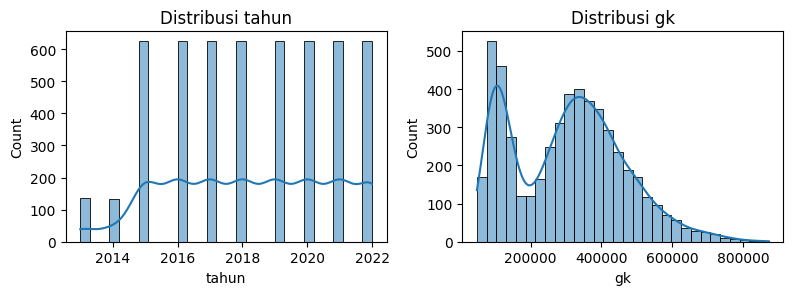

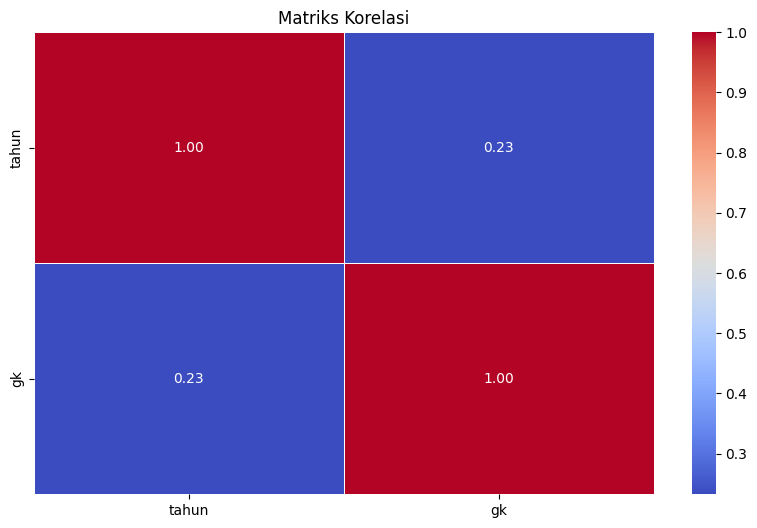

In [574]:
# Analisis Distribusi Variabel Numerik
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Plot distribusi setiap variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [575]:
# =========================
# 1️⃣ Menangani Data Kosong
# =========================
df_cleaned = df_cleaned.dropna()  # Hapus baris dengan nilai kosong

In [576]:
# =========================
# 2️⃣ Menghapus Data Duplikat
# =========================
df_cleaned = df_cleaned.drop_duplicates()


In [577]:
# 2. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=['number']).columns

# Menyimpan hasil normalisasi dalam DataFrame baru
df_cleaned.loc[:, numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Menampilkan hasil normalisasi (5 data pertama)
df_cleaned.head()

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_12728\3282425161.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.30206547 -1.30206547 -0.90071989 ...  1.10600804  1.50735363
  1.50735363]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,-1.302065,MARET,-0.064537
1,ACEH,MAKANAN,PERKOTAAN,-1.302065,SEPTEMBER,-0.011230
2,ACEH,MAKANAN,PERKOTAAN,-0.900720,MARET,0.014788
3,ACEH,MAKANAN,PERKOTAAN,-0.900720,SEPTEMBER,0.100302
4,ACEH,MAKANAN,PERDESAAN,-1.302065,MARET,-0.040624


In [578]:
# 3. Deteksi Outlier menggunakan IQR
Q1 = df_cleaned[numerical_features].quantile(0.25)
Q3 = df_cleaned[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data tanpa outlier
df_no_outliers = df_cleaned[~((df_cleaned[numerical_features] < lower_bound) | (df_cleaned[numerical_features] > upper_bound)).any(axis=1)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_no_outliers.shape

(5256, 6)

In [579]:
# # 4. Encoding Data Kategorikal
# categorical_features = df_no_outliers.select_dtypes(include=['object']).columns

# # Menggunakan LabelEncoder untuk mengonversi data kategorikal
# label_encoders = {}
# for col in categorical_features:
#     le = LabelEncoder()
#     df_no_outliers.loc[:, col] = le.fit_transform(df_no_outliers[col]) 
#     label_encoders[col] = le

# # Menampilkan hasil encoding (5 data pertama)
# df_no_outliers.head()

# # 5️⃣ Simpan hasil preprocessing ke dalam df_preprocessed
# df_preprocessed = df_no_outliers.copy()

# # 6️⃣ Tampilkan hasil akhir
# print(df_preprocessed.head())
# print(f"Jumlah baris dan kolom setelah preprocessing: {df_preprocessed.shape}")

In [580]:
# =========================
# 4️⃣ Deteksi & Penanganan Outlier
# =========================
# Metode IQR
Q1 = df_cleaned[numerical_features].quantile(0.25)
Q3 = df_cleaned[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_cleaned[~((df_cleaned[numerical_features] < (Q1 - 1.5 * IQR)) | 
                              (df_cleaned[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Metode LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=20)
outlier_flags = lof.fit_predict(df_no_outliers[numerical_features])
df_no_outliers = df_no_outliers[outlier_flags == 1]  # Hanya ambil data non-outlier

print(f"✅ Jumlah data setelah menangani outlier: {df_no_outliers.shape}")

✅ Jumlah data setelah menangani outlier: (5224, 6)


In [581]:
# =========================
# 5️⃣ Encoding Data Kategorikal
# =========================
categorical_features = df_no_outliers.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
    label_encoders[col] = le  # Simpan encoder untuk mapping kembali nanti

print(f"✅ Data setelah encoding:\n{df_no_outliers.head()}")

# =========================
# **Dataset Siap Digunakan untuk Clustering**
# =========================
df_preprocessed = df_no_outliers.copy()  # Simpan hasil preprocessing

✅ Data setelah encoding:
   provinsi  jenis  daerah     tahun  periode        gk
0         0      0       2 -1.302065        0 -0.064537
1         0      0       2 -1.302065        1 -0.011230
2         0      0       2 -0.900720        0  0.014788
3         0      0       2 -0.900720        1  0.100302
4         0      0       0 -1.302065        0 -0.040624


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

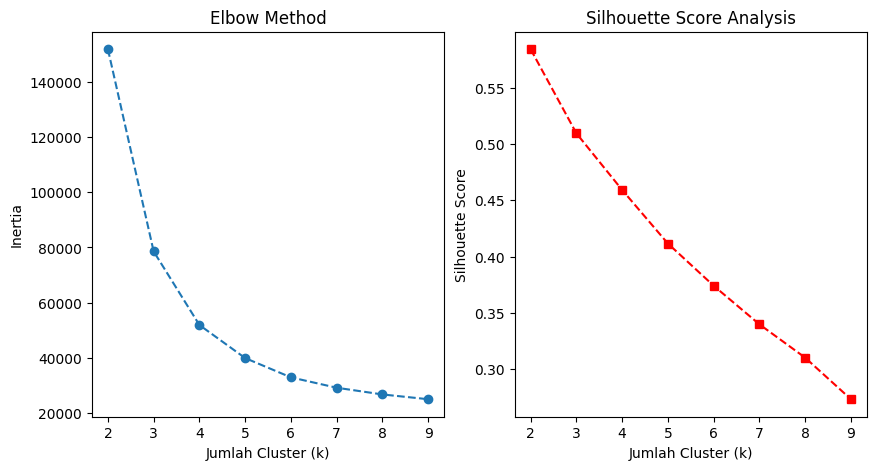

In [582]:


# =========================
# 1️⃣ Menentukan Jumlah Optimal Cluster
# =========================
# Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Coba dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_preprocessed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

# Pilih jumlah cluster optimal berdasarkan elbow dan silhouette
optimal_clusters = 3  # Sesuaikan dengan hasil dari grafik 

In [583]:
# =========================
# 2️⃣ Membangun Model Clustering
# =========================
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_preprocessed['cluster'] = kmeans.fit_predict(df_preprocessed)

In [584]:
# Cek jumlah anggota di setiap cluster
df_preprocessed['cluster'].value_counts()

cluster
0    1801
1    1762
2    1661
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [585]:
# =========================
# 3️⃣ Evaluasi Model
# =========================
silhouette_avg = silhouette_score(df_preprocessed.drop(columns=['cluster']), df_preprocessed['cluster'])
print(f"✅ Silhouette Score: {silhouette_avg:.4f}")


# Bangun model KMeans
model_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_preprocessed['Cluster'] = model_kmeans.fit_predict(df_preprocessed)

✅ Silhouette Score: 0.5094


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

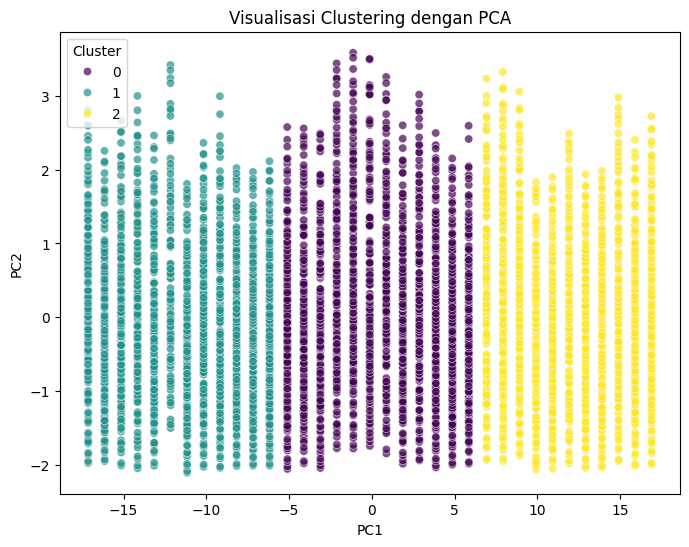

In [586]:
# =========================
# 4️⃣ Visualisasi Cluster (PCA)
# =========================
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed.drop(columns=['cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_preprocessed['cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi Clustering dengan PCA')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [587]:
df_preprocessed['Cluster'] = model_kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [588]:
# 1️⃣ Salin Data yang Akan Di-inverse
df_inverse = df_preprocessed.copy()  

# 2️⃣ Pastikan Hanya Fitur yang Dinormalisasi yang Di-inverse
features_to_inverse = numerical_features  # Menggunakan daftar fitur numerikal yang telah dinormalisasi

# 3️⃣ Lakukan Inverse Transform dengan StandardScaler
df_inverse[features_to_inverse] = scaler.inverse_transform(df_preprocessed[features_to_inverse])

# 4️⃣ Inverse Transform untuk Fitur Kategorikal
for col, le in label_encoders.items():
    df_inverse[col] = le.inverse_transform(df_preprocessed[col])  

# 🔹 Cek Statistik Data Setelah Inverse Transform
print("\n📌 Statistik setelah inverse transform fitur numerikal:")
print(df_inverse[features_to_inverse].describe())

# 🔹 Periksa Beberapa Baris untuk Memastikan Perubahan
print("\n📌 Data setelah inverse transform:")
print(df_inverse.head())


📌 Statistik setelah inverse transform fitur numerikal:
             tahun             gk
count  5224.000000    5224.000000
mean   2018.248851  303955.128446
std       2.489053  157222.431179
min    2013.000000   52529.000000
25%    2016.000000  145902.000000
50%    2018.000000  313913.000000
75%    2020.000000  410181.250000
max    2022.000000  804517.000000

📌 Data setelah inverse transform:
  provinsi    jenis     daerah   tahun    periode        gk  cluster  Cluster
0     ACEH  MAKANAN  PERKOTAAN  2015.0      MARET  293697.0        1        0
1     ACEH  MAKANAN  PERKOTAAN  2015.0  SEPTEMBER  302128.0        1        0
2     ACEH  MAKANAN  PERKOTAAN  2016.0      MARET  306243.0        1        0
3     ACEH  MAKANAN  PERKOTAAN  2016.0  SEPTEMBER  319768.0        1        0
4     ACEH  MAKANAN  PERDESAAN  2015.0      MARET  297479.0        1        0


In [589]:
# Cek statistik sebelum dan sesudah inverse
print("Statistik sebelum normalisasi:")
print(df_cleaned[['tahun', 'gk']].describe())

print("\nStatistik setelah inverse:")
print(df_inverse[['tahun', 'gk']].describe())

Statistik sebelum normalisasi:
              tahun            gk
count  5.261000e+03  5.261000e+03
mean  -1.451946e-14 -1.593690e-16
std    1.000095e+00  1.000095e+00
min   -2.104757e+00 -1.614451e+00
25%   -9.007199e-01 -1.006760e+00
50%   -9.802872e-02  5.936871e-02
75%    7.046625e-01  6.719977e-01
max    1.507354e+00  3.597213e+00

Statistik setelah inverse:
             tahun             gk
count  5224.000000    5224.000000
mean   2018.248851  303955.128446
std       2.489053  157222.431179
min    2013.000000   52529.000000
25%    2016.000000  145902.000000
50%    2018.000000  313913.000000
75%    2020.000000  410181.250000
max    2022.000000  804517.000000


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [590]:
print("📌 Distribusi jumlah data dalam tiap cluster:")
print(df_inverse['Cluster'].value_counts())

📌 Distribusi jumlah data dalam tiap cluster:
Cluster
1    1801
0    1762
2    1661
Name: count, dtype: int64


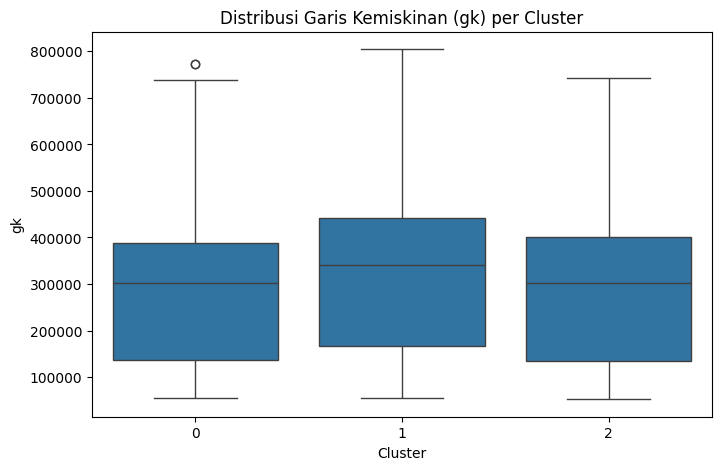

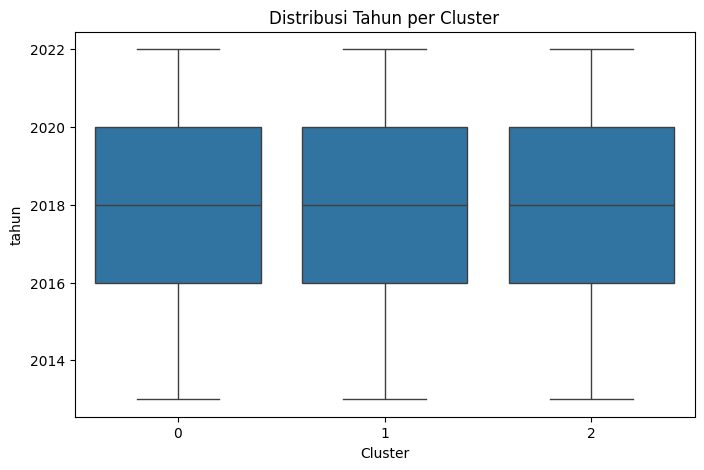

In [591]:
# Boxplot untuk "gk" per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='gk', data=df_inverse)
plt.title("Distribusi Garis Kemiskinan (gk) per Cluster")
plt.show()

# Boxplot untuk "tahun" per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='tahun', data=df_inverse)
plt.title("Distribusi Tahun per Cluster")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1: Rata-rata Garis Kemiskinan (gk): Sekitar 300.000
2. Cluster 2: Rata-rata Garis Kemiskinan (gk): Sedikit lebih tinggi dibanding Cluster 0 (sekitar 320.000).
3. Cluster 3: Rata-rata Garis Kemiskinan (gk): Serupa dengan Cluster 0, berkisar sekitar 300.000.


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Garis Kemiskinan (gk): Sekitar 300.000** 
- **RDistribusi Tahun: Median sekitar 2018, dengan rentang antara 2013 hingga 2022.**
- **Analisis:** Cluster ini memiliki rentang kemiskinan yang cukup luas, tetapi cenderung berada di bawah rata-rata nasional.
Outlier di cluster ini menunjukkan beberapa daerah dengan garis kemiskinan yang sangat tinggi, yang mungkin terjadi karena faktor lokal atau kebijakan ekonomi tertentu.
## Cluster 2:
- **Rata-rata Garis Kemiskinan (gk): Sedikit lebih tinggi dibanding Cluster 0 (sekitar 320.000).**
- **Distribusi Tahun: Hampir identik dengan Cluster 0, dengan median di sekitar 2018 dan rentang 2013 hingga 2022.**
- **Analisis:** Tingkat garis kemiskinan lebih tinggi dibanding cluster lainnya, menunjukkan bahwa wilayah-wilayah dalam cluster ini memiliki beban ekonomi lebih berat.
Beberapa outlier menunjukkan daerah dengan garis kemiskinan paling tinggi di dataset.
|Perlu investigasi lebih lanjut apakah faktor geografis atau kebijakan lokal berpengaruh terhadap hasil ini.

## Cluster 3:
- **Rata-rata Garis Kemiskinan (gk): Serupa dengan Cluster 0, berkisar sekitar 300.000.**
- **Distribusi Tahun: Tidak jauh berbeda dengan cluster lainnya, dengan median di sekitar 2018.** 
- **Analisis:** Mirip dengan Cluster 0, dengan distribusi garis kemiskinan yang lebih terkendali dibanding Cluster 1.
Wilayah dalam cluster ini cenderung memiliki tingkat kemiskinan stabil, tanpa lonjakan drastis seperti yang terlihat di Cluster 1.
Kemungkinan terdiri dari daerah yang memiliki pertumbuhan ekonomi lebih stabil, dengan sedikit variasi ekstrem.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [592]:
# Simpan dataset hasil clustering ke dalam file CSV
df_inverse.to_csv("clustered_garis_kemiskinan.csv", index=False)

print(" Dataset hasil clustering berhasil diekspor sebagai 'hasil_clustering.csv'")

 Dataset hasil clustering berhasil diekspor sebagai 'hasil_clustering.csv'
